# MSA 2024 Phase 2 - Part 1

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [2]:
#Load chosen datasets from the datasets folder into your notebook and display the first ten instances.
df = pd.read_csv("../0. Resources/datasets/X store sales/store_sales.csv", encoding='ISO-8859-1')
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [4]:
#Provide key statistical measures such as mean and standard deviation without hardcoding them.
numeric_df = df.select_dtypes(include=['float64', 'int64'])
columns_to_exclude = ['Row ID', 'Postal Code'] #Statistics of these variables contains no meaning
numeric_df = numeric_df.drop(columns=columns_to_exclude, errors='ignore')
statistics = numeric_df.describe()
print("Mean and Standard Deviation:")
print("Mean:\n", statistics.loc['mean'])
print("Standard Deviation:\n", statistics.loc['std'])

Mean and Standard Deviation:
Mean:
 Sales       349.834887
Quantity      3.785007
Discount      0.173923
Profit        8.699327
Name: mean, dtype: float64
Standard Deviation:
 Sales       503.179145
Quantity      2.251620
Discount      0.181547
Profit      136.049246
Name: std, dtype: float64


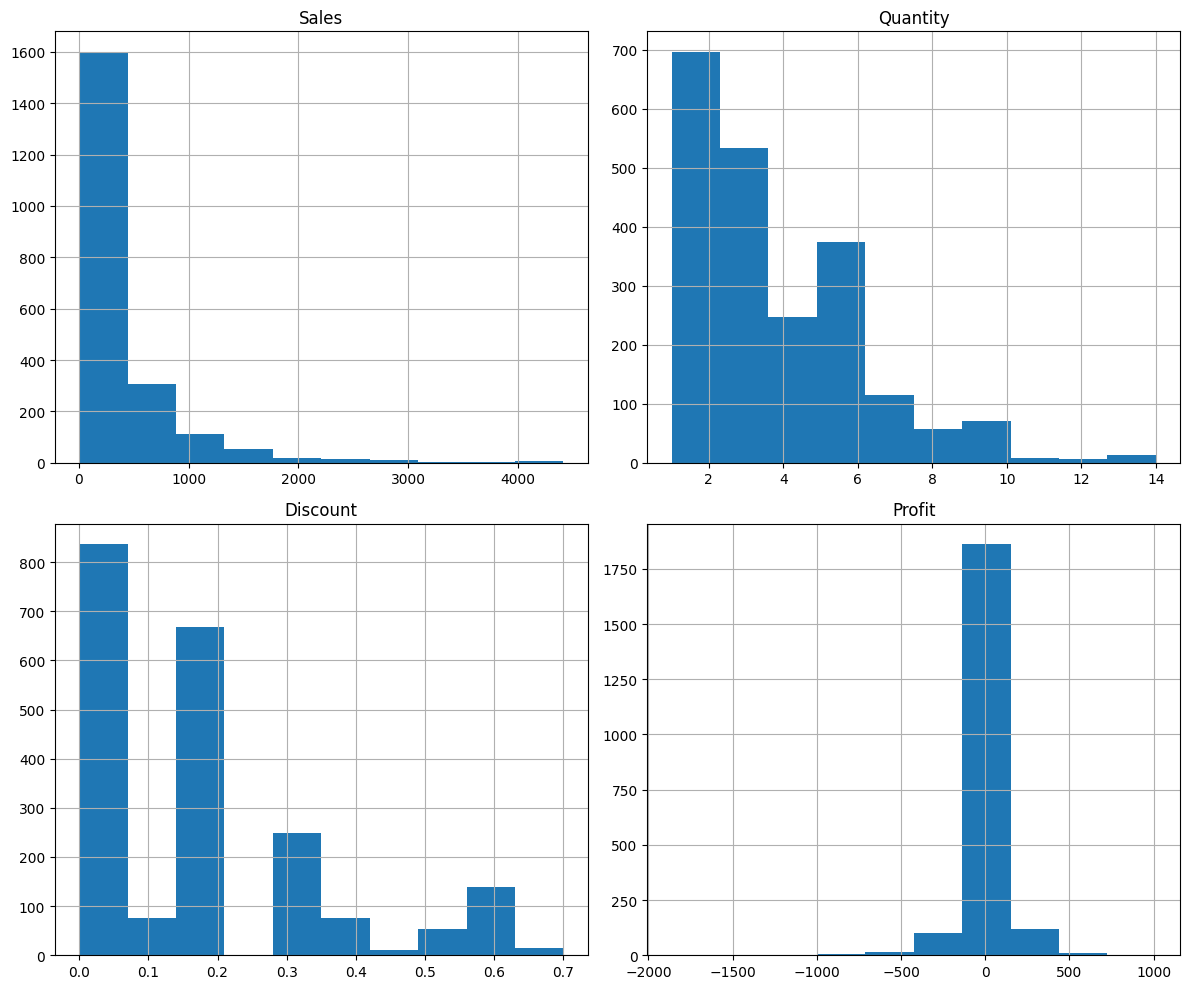

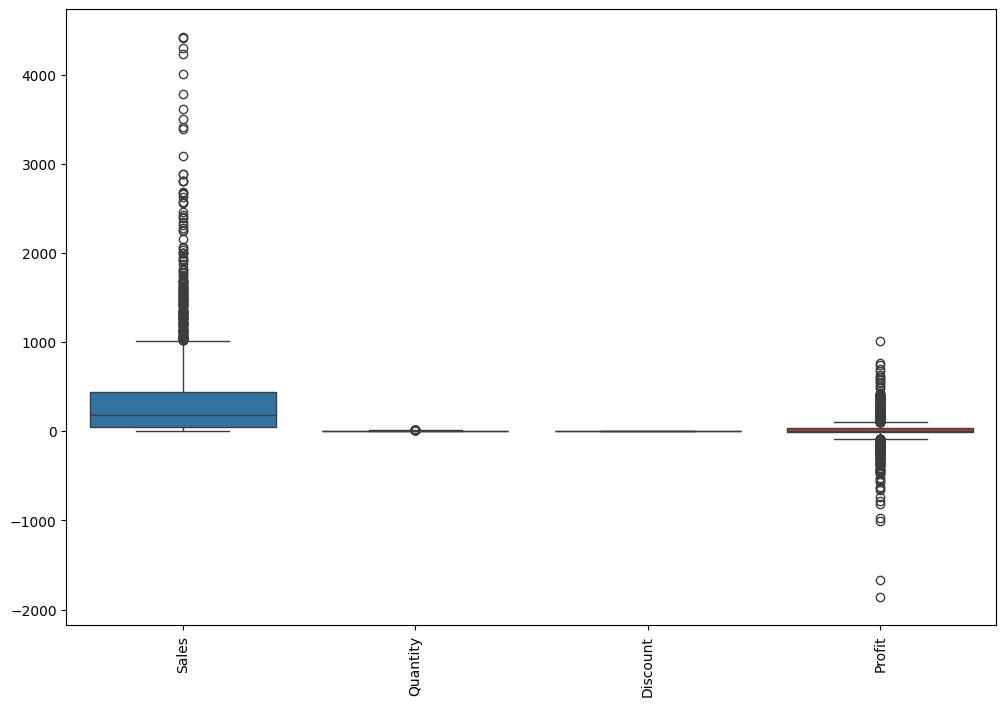

In [5]:
#Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.
numeric_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=90)
plt.show()

Sales and Quantity are noticeably right-skewed.

In [6]:
#Convert data types of columns as needed, ensuring all values fed into machine learning models are numerical.

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day
df = df.drop(columns=['Order Date', 'Ship Date'])
df = df.drop(columns=['Row ID']) # I dropped Row ID because it does not contribute information to the model

In [7]:
df_encoded = pd.get_dummies(df, columns=[
    'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 
    'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 
    'Product ID', 'Category', 'Sub-Category', 'Product Name'
])
print(df_encoded.dtypes)
df_encoded.head(10)

Sales                                                                 float64
Quantity                                                                int64
Discount                                                              float64
Profit                                                                float64
Order Year                                                              int32
                                                                       ...   
Product Name_Ultra Door Pull Handle                                      bool
Product Name_Ultra Door Push Plate                                       bool
Product Name_Westinghouse Clip-On Gooseneck Lamps                        bool
Product Name_Westinghouse Floor Lamp with Metal Mesh Shade, Black        bool
Product Name_Westinghouse Mesh Shade Clip-On Gooseneck Lamp, Black       bool
Length: 4833, dtype: object


,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day,...,Product Name_Tensor Brushed Steel Torchiere Floor Lamp,Product Name_Tensor Computer Mounted Lamp,Product Name_Tensor Track Tree Floor Lamp,Product Name_Ultra Commercial Grade Dual Valve Door Closer,"Product Name_Ultra Door Kickplate, 8""H x 34""W",Product Name_Ultra Door Pull Handle,Product Name_Ultra Door Push Plate,Product Name_Westinghouse Clip-On Gooseneck Lamps,"Product Name_Westinghouse Floor Lamp with Metal Mesh Shade, Black","Product Name_Westinghouse Mesh Shade Clip-On Gooseneck Lamp, Black"
0,261.9600,2,0.00,41.9136,2016,11,8,2016,11,11,...,False,False,False,False,False,False,False,False,False,False
1,731.9400,3,0.00,219.5820,2016,11,8,2016,11,11,...,False,False,False,False,False,False,False,False,False,False
2,957.5775,5,0.45,-383.0310,2015,10,11,2015,10,18,...,False,False,False,False,False,False,False,False,False,False
3,48.8600,7,0.00,14.1694,2014,6,9,2014,6,14,...,False,False,False,False,False,False,False,False,False,False
4,1706.1840,9,0.20,85.3092,2014,6,9,2014,6,14,...,False,False,False,False,False,False,False,False,False,False
5,71.3720,2,0.30,-1.0196,2017,7,16,2017,7,18,...,False,False,False,False,False,False,False,False,False,False
6,1044.6300,3,0.00,240.2649,2015,9,25,2015,9,30,...,False,False,False,False,False,False,False,False,False,False
7,3083.4300,7,0.50,-1665.0522,2015,9,17,2015,9,21,...,False,False,False,False,False,False,False,False,False,False
8,124.2000,3,0.20,15.5250,2015,9,17,2015,9,21,...,False,False,False,False,False,False,False,False,False,False
9,190.9200,5,0.60,-147.9630,2016,12,8,2016,12,10,...,False,False,False,False,False,False,False,False,False,False


## 2. Clean data

In [11]:
# Handling missing values - there is none
df_encoded.isna().sum() #no dataloss - good to go

Sales                                                                 0
Quantity                                                              0
Discount                                                              0
Profit                                                                0
Order Year                                                            0
                                                                     ..
Product Name_Ultra Door Pull Handle                                   0
Product Name_Ultra Door Push Plate                                    0
Product Name_Westinghouse Clip-On Gooseneck Lamps                     0
Product Name_Westinghouse Floor Lamp with Metal Mesh Shade, Black     0
Product Name_Westinghouse Mesh Shade Clip-On Gooseneck Lamp, Black    0
Length: 4833, dtype: int64

In [13]:
top_profits = df_encoded.nlargest(5, 'Profit')
top_profits

,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day,...,Product Name_Tensor Brushed Steel Torchiere Floor Lamp,Product Name_Tensor Computer Mounted Lamp,Product Name_Tensor Track Tree Floor Lamp,Product Name_Ultra Commercial Grade Dual Valve Door Closer,"Product Name_Ultra Door Kickplate, 8""H x 34""W",Product Name_Ultra Door Pull Handle,Product Name_Ultra Door Push Plate,Product Name_Westinghouse Clip-On Gooseneck Lamps,"Product Name_Westinghouse Floor Lamp with Metal Mesh Shade, Black","Product Name_Westinghouse Mesh Shade Clip-On Gooseneck Lamp, Black"
2063,4404.90,5,0.0,1013.1270,2015,11,8,2015,11,12,...,False,False,False,False,False,False,False,False,False,False
1452,2567.84,8,0.0,770.3520,2015,5,31,2015,6,4,...,False,False,False,False,False,False,False,False,False,False
1577,2573.82,9,0.0,746.4078,2014,1,6,2014,1,10,...,False,False,False,False,False,False,False,False,False,False
1070,3504.90,5,0.0,700.9800,2016,5,27,2016,5,29,...,False,False,False,False,False,False,False,False,False,False
366,2807.84,8,0.0,673.8816,2014,12,1,2014,12,3,...,False,False,False,False,False,False,False,False,False,False


In [14]:
least_profits = df_encoded.nsmallest(5, 'Profit')
least_profits

,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day,...,Product Name_Tensor Brushed Steel Torchiere Floor Lamp,Product Name_Tensor Computer Mounted Lamp,Product Name_Tensor Track Tree Floor Lamp,Product Name_Ultra Commercial Grade Dual Valve Door Closer,"Product Name_Ultra Door Kickplate, 8""H x 34""W",Product Name_Ultra Door Pull Handle,Product Name_Ultra Door Push Plate,Product Name_Westinghouse Clip-On Gooseneck Lamps,"Product Name_Westinghouse Floor Lamp with Metal Mesh Shade, Black","Product Name_Westinghouse Mesh Shade Clip-On Gooseneck Lamp, Black"
2044,4297.644,13,0.4,-1862.3124,2015,1,28,2015,1,31,...,False,False,False,False,False,False,False,False,False,False
7,3083.430,7,0.5,-1665.0522,2015,9,17,2015,9,21,...,False,False,False,False,False,False,False,False,False,False
1108,2314.116,7,0.4,-1002.7836,2017,10,2,2017,10,5,...,False,False,False,False,False,False,False,False,False,False
1909,1875.258,7,0.4,-968.8833,2017,10,16,2017,10,21,...,False,False,False,False,False,False,False,False,False,False
100,1272.630,6,0.5,-814.4832,2016,4,22,2016,4,29,...,False,False,False,False,False,False,False,False,False,False


In [15]:
mean_profit = df_encoded['Profit'].mean()
std_dev_profit = df_encoded['Profit'].std()

# Calculate the upper and lower bounds for outliers
lower_bound = mean_profit - 3 * std_dev_profit
upper_bound = mean_profit + 3 * std_dev_profit

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

Lower Bound for Outliers: -399.44841220730297
Upper Bound for Outliers: 416.8470664270107


In [17]:
outliers = df_encoded[(df_encoded['Profit'] < lower_bound) | (df_encoded['Profit'] > upper_bound)]

# Count the number of outliers
number_of_outliers = outliers.shape[0]

# Calculate the total number of rows in df_encoded
total_rows = df_encoded.shape[0]

# Calculate the percentage of data that would be lost
percentage_of_data_lost = (number_of_outliers / total_rows) * 100

# Output the results
print(f"Number of Outliers in df_encoded: {number_of_outliers}")
print(f"Percentage of Data Lost from df_encoded: {percentage_of_data_lost:.2f}%")

Number of Outliers in df_encoded: 44
Percentage of Data Lost from df_encoded: 2.07%


In [18]:
# Since we are only losing 2% of data, I think it is acceptable to remove rows of data that has profit outside of these bounds.
df_no_outlier = df_encoded[(df_encoded['Profit'] >= lower_bound) & (df_encoded['Profit'] <= upper_bound)]
print(f"Original number of rows: {df_encoded.shape[0]}")
print(f"Number of rows after removing outliers: {df_no_outlier.shape[0]}")

Original number of rows: 2121
Number of rows after removing outliers: 2077


## 3. Visualise data

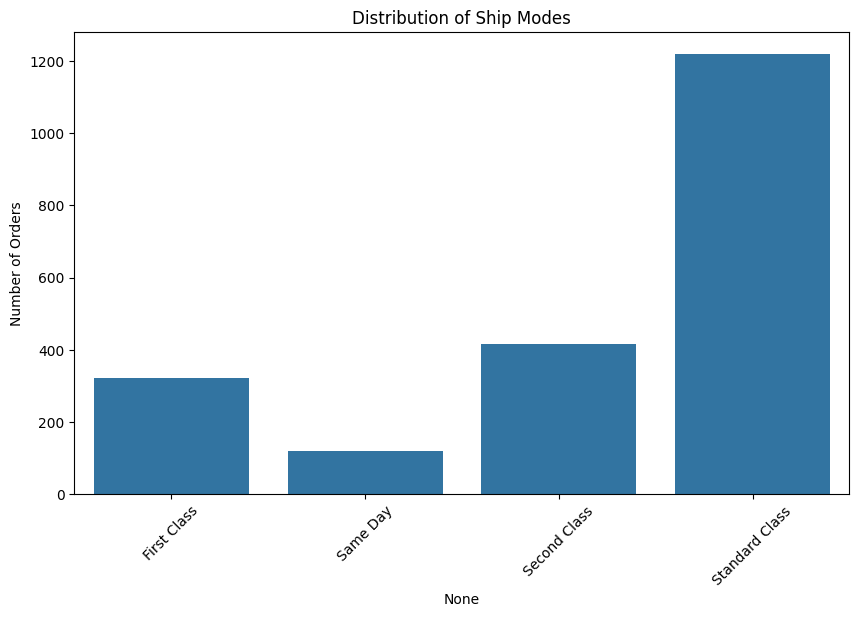

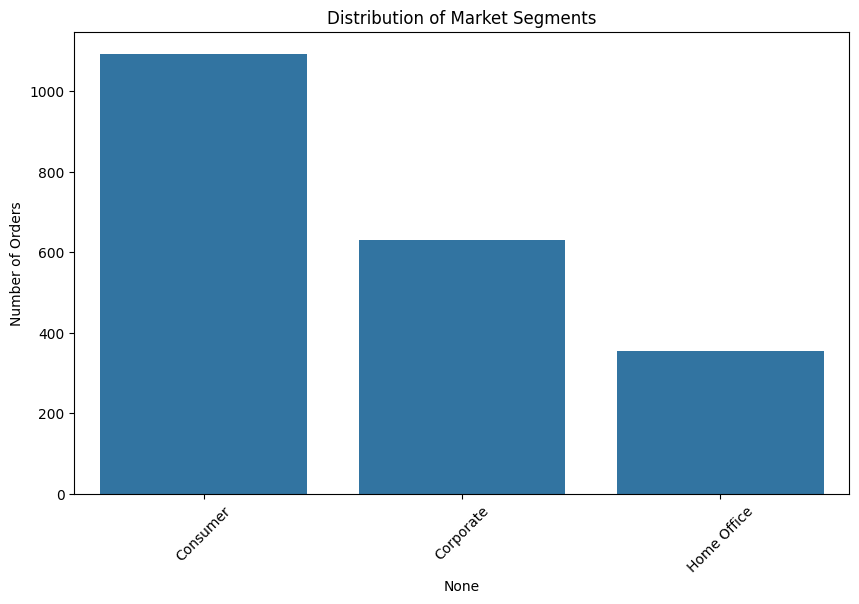

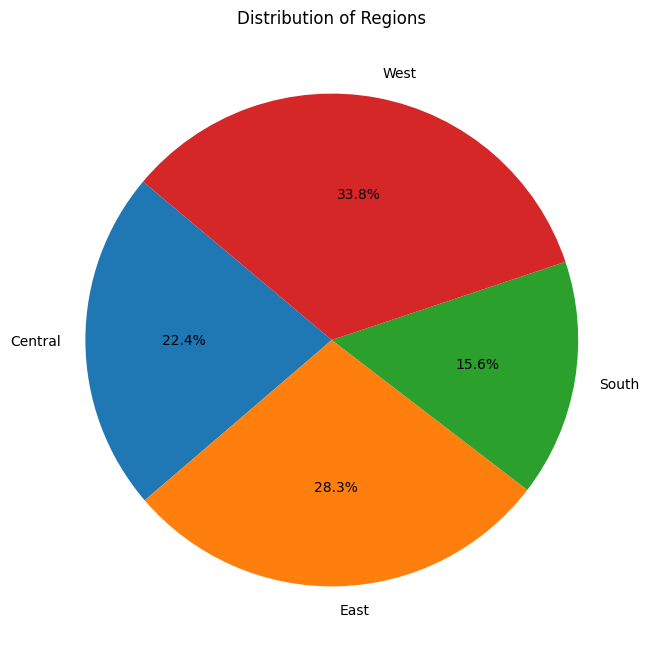

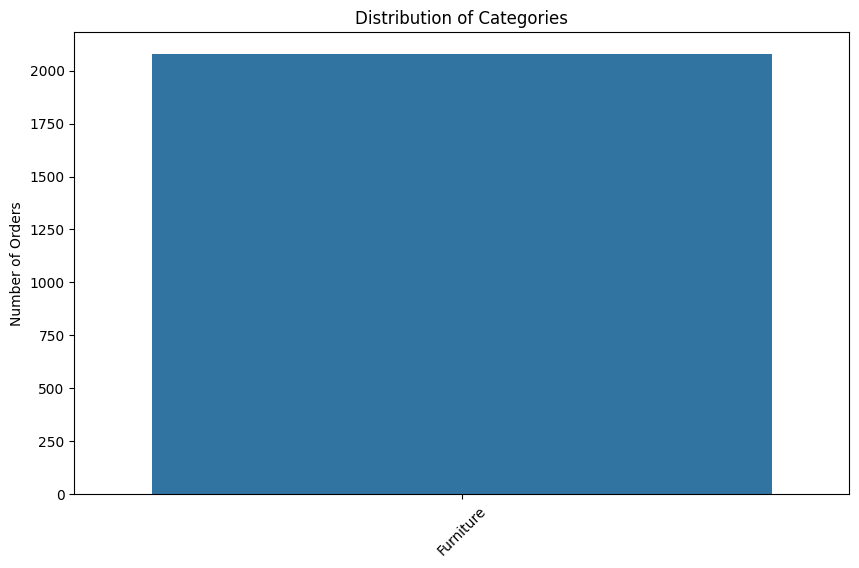

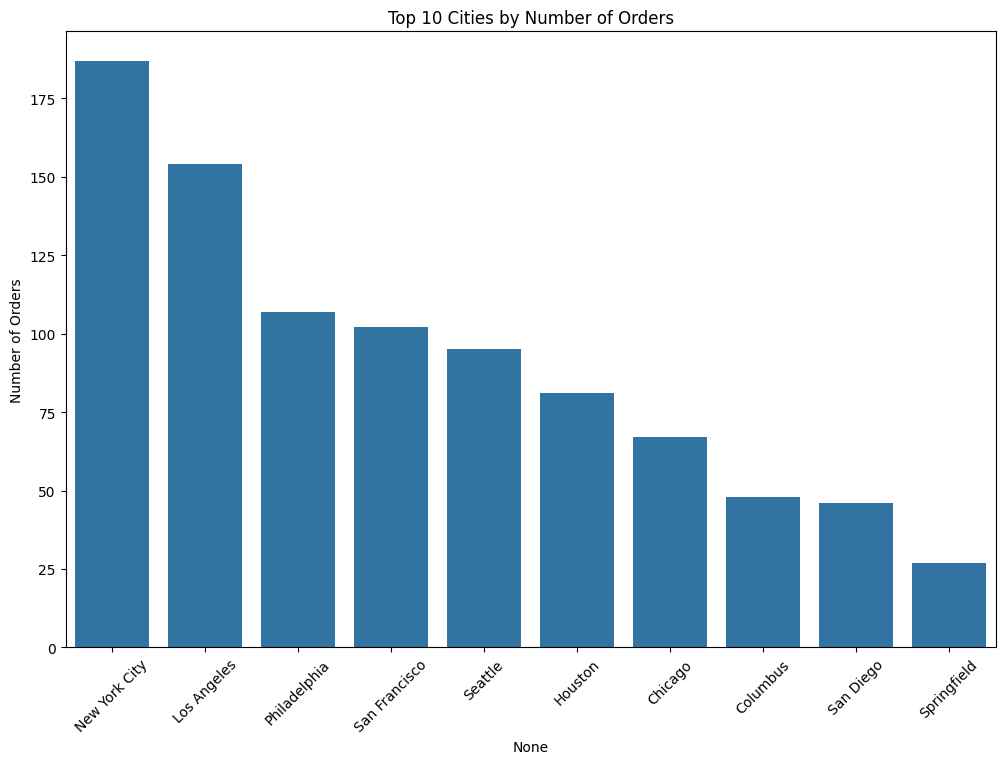

In [44]:
ship_mode_columns = [col for col in df_no_outlier.columns if 'Ship Mode_' in col]
ship_mode_counts = df_no_outlier[ship_mode_columns].sum().rename(lambda x: x.split('_')[1])
plt.figure(figsize=(10, 6))
sns.barplot(x=ship_mode_counts.index, y=ship_mode_counts.values)
plt.title('Distribution of Ship Modes')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

segment_columns = [col for col in df_no_outlier.columns if 'Segment_' in col]
segment_counts = df_no_outlier[segment_columns].sum().rename(lambda x: x.split('_')[1])
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Distribution of Market Segments')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

region_columns = [col for col in df_no_outlier.columns if col.startswith('Region_')]
if region_columns:
    region_counts = df_no_outlier[region_columns].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(region_counts, labels=[col.split('_')[1] for col in region_columns], autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Regions')
    plt.show()

category_columns = [col for col in df_no_outlier.columns if col.startswith('Category_')]
if category_columns:
    category_counts = df_no_outlier[category_columns].sum()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[col.split('_')[1] for col in category_columns], y=category_counts.values)
    plt.title('Distribution of Categories')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45)
    plt.show()

city_counts = df_no_outlier[[col for col in df_no_outlier.columns if 'City_' in col]].sum()
city_counts.index = [col.split('_')[1] for col in city_counts.index]  # Assuming format "City_X"
top_cities = city_counts.sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities by Number of Orders')
plt.xticks(rotation=45)
plt.ylabel('Number of Orders')
plt.show()

## 4. Identify correlated variables

In [23]:
correlation_matrix = df_no_outlier[['Profit', 'Sales', 'Quantity', 'Discount']].corr()
print(correlation_matrix)

            Profit     Sales  Quantity  Discount
Profit    1.000000  0.328117  0.161545 -0.548756
Sales     0.328117  1.000000  0.403320 -0.038694
Quantity  0.161545  0.403320  1.000000 -0.030386
Discount -0.548756 -0.038694 -0.030386  1.000000


In [ ]:
# Moderate positive correlation between Profit and Sales (0.33) suggests that increasing sales tends to increase profit
# Weak positive correlation between Profit and Quantity (0.16) implies that selling more units could mildly increase profits but might not be as significant as sales value
# Strong negative correlation between Profit and Discount (-0.55) indicates that higher discounts significantly decrease profit.

## 5. Summary

In the course of preparing the dataset for training and evaluation, extensive exploratory data analysis (EDA) and preprocessing were undertaken to ensure data quality and relevance for predictive modeling. The initial phase involved reviewing the dataset structure and content, leading to the identification and subsequent removal of unnecessary variable 'Row ID', which were deemed irrelevant for modeling purposes. Notably, categorical variables such as 'Ship Mode', 'Segment', and 'Region' were transformed through one-hot encoding to facilitate their use in machine learning models, converting categorical data into a numerical format that is more suitable for analysis. 'Postal Code', albeit already seems to be numerical, functions more like a categorical variable, hence it is also transformed through one-hot encoding.

During the EDA, a detailed correlation analysis has been conducted, and we found a strong negative correlation between discounts and profits, suggesting that higher discounts might be decreasing profit margins. This finding underscored the potential need for a strategic review of discount policies to bolster profitability. Outliers in the 'Profit' column were then identified using the standard deviation method, revealing that extreme profit values (both positive and negative) were affecting the overall data distribution. This led to the removal of these outliers. With the dataset showing a loss of only about 2% of the data, this should be a reasonable compromise to enhance model accuracy and robustness.

Graphs are then made from the visualisation of transformed data, with various plots such as bar charts and pie charts employed to illustrate the distribution of data across different categories and regions. These visual representations helped in understanding the frequency and distribution patterns of the data, contributing to more informed decision-making regarding which features to include in the model. The handling of non-numerical columns via one-hot encoding allowed for the inclusion of these variables in the correlation analysis, enhancing the comprehensiveness of the dataset evaluation.

In conclusion, the preprocessing steps should refine the dataset effectively.